In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

from fbprophet import Prophet

%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv('dataset/sales_train.csv')
test = pd.read_csv('dataset/test.csv')
shops = pd.read_csv('dataset/shops.csv')
items = pd.read_csv('dataset/items.csv')
items_categories = pd.read_csv('dataset/item_categories.csv')
submission = pd.read_csv('dataset/sample_submission.csv')

In [4]:
train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


In [5]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [6]:
items_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [7]:
ts = train.groupby(["date_block_num"])["item_cnt_day"].sum()
ts.index = pd.date_range(start = '2013-01-01',end = '2015-10-01', freq = 'MS')
ts = ts.reset_index()
ts.head()

,index,item_cnt_day
0,2013-01-01,131479.0
1,2013-02-01,128090.0
2,2013-03-01,147142.0
3,2013-04-01,107190.0
4,2013-05-01,106970.0


In [9]:
ts.columns=['ds','y']
model = Prophet( yearly_seasonality=True)
model.fit(ts)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [20]:
# predict for 1 month in the furure and MS - month start is the frequency
future = model.make_future_dataframe(periods = 1, freq = 'MS')
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
30,2015-07-01,64183.313514,61071.631419,67263.039948
31,2015-08-01,68333.314082,65457.342286,71514.447228
32,2015-09-01,70570.861117,67361.524951,73600.693984
33,2015-10-01,71762.716154,68841.505801,74947.926788
34,2015-11-01,82148.114207,79206.963960,85145.317582


In [21]:
forecast.describe()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.0,35.0,35.0,35.000000
mean,110202.899517,103560.752446,109594.673533,110201.931165,110203.963884,-3618.650651,-3618.650651,-3618.650651,-3618.650651,-3618.650651,-3618.650651,0.0,0.0,0.0,106584.248866
std,21061.100019,28210.888090,28230.515899,21063.079926,21058.925383,19769.443087,19769.443087,19769.443087,19769.443087,19769.443087,19769.443087,0.0,0.0,0.0,28228.673855
min,68385.922340,61071.631419,67263.039948,68352.030002,68423.175180,-29005.645647,-29005.645647,-29005.645647,-29005.645647,-29005.645647,-29005.645647,0.0,0.0,0.0,64183.313514
25%,95437.779082,79248.354606,85228.949371,95437.779082,95437.779082,-14457.974498,-14457.974498,-14457.974498,-14457.974498,-14457.974498,-14457.974498,0.0,0.0,0.0,82272.850962
50%,112855.503713,103963.141477,110186.075154,112855.503713,112855.503713,-8175.888318,-8175.888318,-8175.888318,-8175.888318,-8175.888318,-8175.888318,0.0,0.0,0.0,107102.427046
75%,127212.384997,120619.610342,126526.969279,127212.384997,127212.384997,705.377351,705.377351,705.377351,705.377351,705.377351,705.377351,0.0,0.0,0.0,123537.764209
max,141012.662351,183474.282030,189619.812980,141012.662351,141012.662351,63543.056928,63543.056928,63543.056928,63543.056928,63543.056928,63543.056928,0.0,0.0,0.0,186526.289906


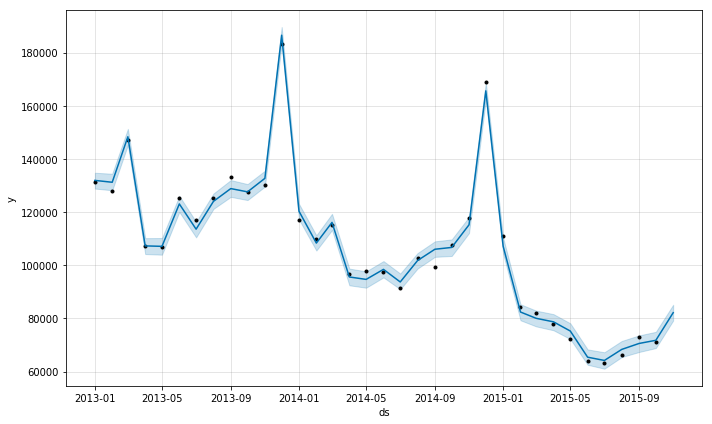

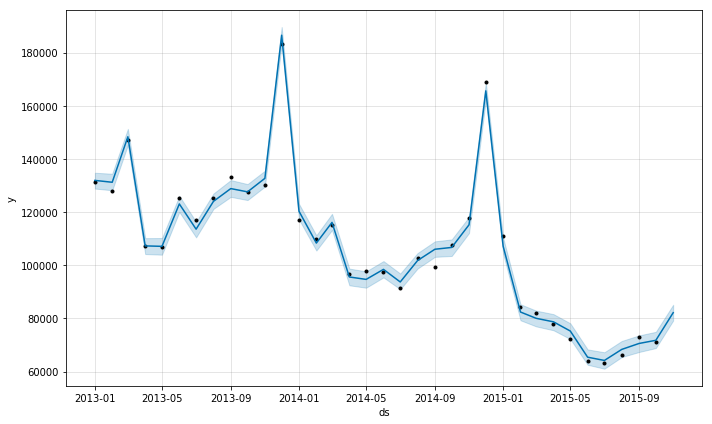

In [22]:
model.plot(forecast)

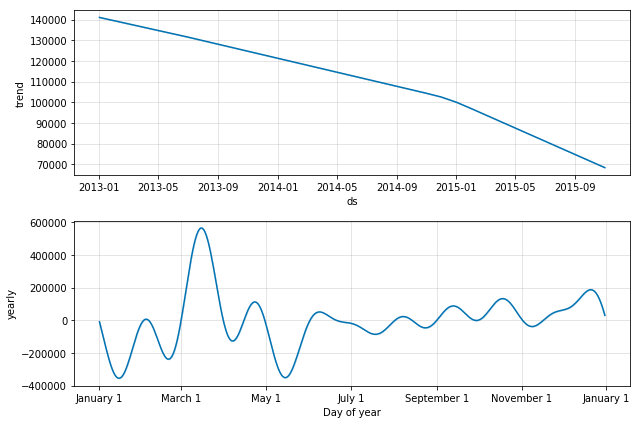

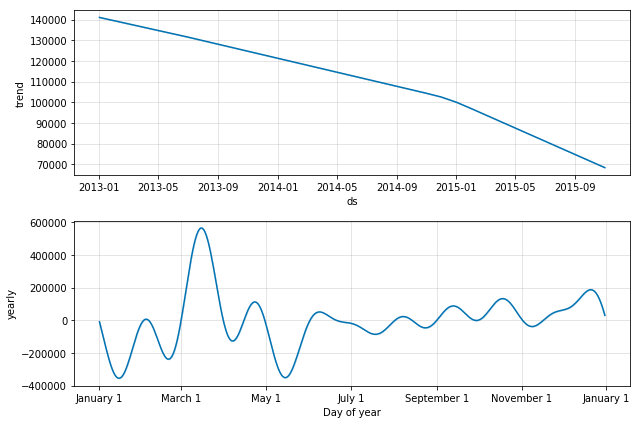

In [23]:
model.plot_components(forecast)

In [24]:
forecast[['ds', 'yhat']]

,ds,yhat
0,2013-01-01,131913.775147
1,2013-02-01,131207.032697
2,2013-03-01,148323.954007
3,2013-04-01,107275.509630
4,2013-05-01,107102.427046
5,2013-06-01,123057.869406
6,2013-07-01,113561.181642
7,2013-08-01,124017.659011
8,2013-09-01,128829.714438
9,2013-10-01,127600.997422
